# Data Mining Lab Report 4
#### NAME: TEAN JIN HE
#### MATRIC ID: SD21063
#### SECTION: 02G

### Case Study:

Clustering is the process of making a group of abstract objects into classes of similar objects is known as
clustering. For this laboratory report, you’ll use the iris dataset to see how many possible clusters can be
created. Ideally, you perform a data mining process to do create a possible cluster from these two k-means
and fuzzy c-means algorithms. Detail regarding the attributes involved are as follows:

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal
width and Class (Species).

### Question 1
#### *General Knowledge*

#### Discuss the clustering concepts in data mining implementation related to biological applications as discussed above. Give reference/ references.

Clustering is a technique of grouping data objects into classes or clusters, such that objects within a cluster have high similarity, while objects from different clusters have low similarity. Clustering is an unsupervised learning method, which means it does not require any prior knowledge or labels for the data. Clustering can be used to discover the inherent structure, patterns, and relationships in the data, as well as to reduce the dimensionality and noise of the data.

One of the most common applications of clustering in data mining is in bioinformatics, which is the field of science that uses computational methods to analyze biological data, such as DNA, RNA, protein, and gene expression data. Bioinformatics can help to understand the molecular basis of life, disease, and evolution. Clustering can be used in bioinformatics for various purposes, such as:

- Gene expression analysis: Clustering can be used to group genes or samples based on their expression levels, which can reveal the functional roles, regulatory mechanisms, and interactions of genes, as well as the similarities and differences among samples. For example, clustering can be used to identify genes that are co-expressed or differentially expressed under different conditions, such as normal and diseased states, or different treatments.

- Protein sequence and structure analysis: Clustering can be used to classify proteins or protein domains based on their sequences or structures, which can provide insights into the evolutionary relationships, functions, and interactions of proteins . For example, clustering can be used to identify protein families, superfamilies, or folds, as well as to predict the structure and function of unknown proteins .

- Phylogenetic analysis: Clustering can be used to construct phylogenetic trees or networks, which can represent the evolutionary history and relationships of organisms, species, or genes . For example, clustering can be used to infer the origin, divergence, and migration of species, as well as to identify the common ancestors, homologs, or orthologs of genes .

There are many clustering algorithms that can be used for data mining and bioinformatics, but two of the most popular ones are k-means and fuzzy c-means. K-means is a partitioning algorithm that divides the data into k clusters, such that each data object belongs to the cluster with the nearest mean or centroid . Fuzzy c-means is a soft clustering algorithm that assigns each data object to one or more clusters with different degrees of membership, such that the sum of the memberships of each object is equal to one . Both algorithms are iterative and aim to minimize the within-cluster variation or distance, but they have different advantages and disadvantages. K-means is simple, fast, and scalable, but it is sensitive to the initial cluster centers, the number of clusters, and the outliers. Fuzzy c-means is more flexible, robust, and able to handle overlapping or ambiguous data, but it is more complex, slow, and prone to noise.

Reference: 

https://builtin.com/data-science/cluster-analysis

https://arxiv.org/ftp/arxiv/papers/1205/1205.1125.pdf

https://www.datamining365.com/2020/01/clustering-in-data-mining.html

### Question 2
#### *Python*

### a. Import related libraries and load the datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import operator
import math
from scipy.spatial import distance
from fcmeans import FCM

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv('iris.csv')
iris.head(7)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


### b. Check and solve the noise in the datasets. 

In [4]:
# Checking Duplicate Data
iris.duplicated().sum()

0

In [5]:
#This data set is not missing any values. 
iris.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# drop Id from dataset
iris.drop(['Id'], axis=1, inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# converting the species into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species']).astype(float)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### c. Set the input attributes and target attribute for iris.csv. 

In [8]:
# Set the input attributes and target attribute
# input
x = iris.iloc[:, :-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# target
y = iris.iloc[:, -1].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### d. Do we need to implement feature scaling for these attributes? Give your reason

No, because feature scaling is the process of modifying the dataset such that it falls into a comparable range, which is often centred around 0 or in the range of (0,1), depending on the scaling approach selected. But the parameters like SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm already show a narrow range in the information that is supplied. Because of this property, feature scaling in this specific dataset is not absolutely necessary. The features' innate modest size decreases the possible effects that different magnitudes may have on how well machine learning algorithms perform, which lessens the importance of feature scaling in this situation.

### e. Find the optimal number of clusters by using elbow method. Explain your answer.

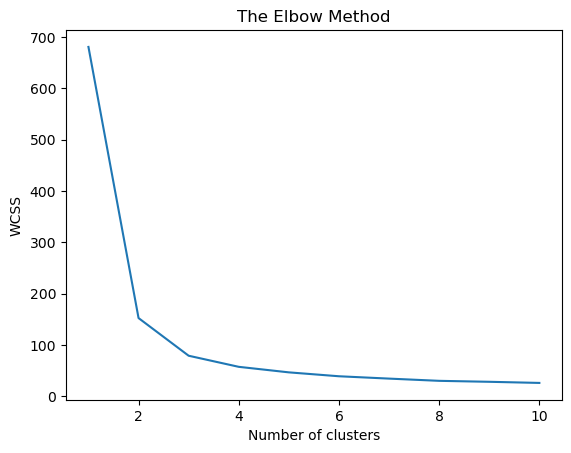

In [10]:
x = iris[list(iris.columns)[:-1]]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(x)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### f. Train k-means and fuzzy c-means algorithm. Explain the hyperparameter settings implemented for both models.

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
X = x.values

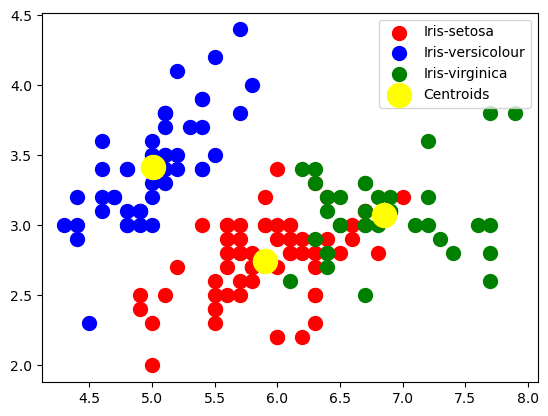

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [13]:
 # fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

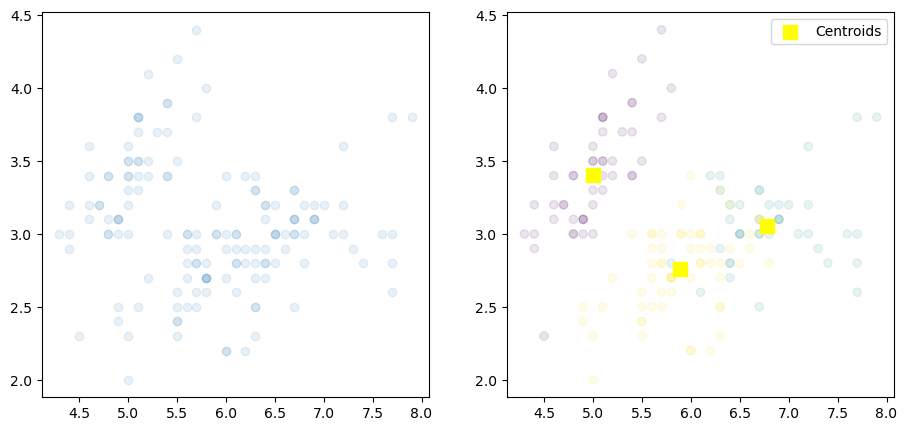

In [14]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="s", s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()

#### Hyperparameter k-means
Number of clusters (n_clusters): 
This is the number of clusters  the algorithm creates. The commonly recommended determination method  is the elbow method. This is especially effective for Scikit-learn's clean theoretical datasets.
 
Initial cluster midpoint (init): 
Define the starting point of the cluster here. In our case, we have three clusters, so we need to provide three sets of initial centroid arrays.
 
Random Seed (random_state): 
This parameter contains the random seed settings. This is useful if you want to consistently reproduce exactly the  same cluster. This ensures consistency of the randomization process and allows cluster replication if necessary.

#### Hyperparameter for fuzzy-c-means

Number of clusters (n_clusters=3): 
The hyperparameter n_clusters  is set to 3 and specifies the desired number of clusters in the data.


### g. Visualise the models developed and compare the result.

K-Means: 

This image shows a scatter plot with data points in three different colors: blue, red, and green. It represents three different types of iris flowers ( Iris-setosa, Irisversicolor, Iris-virginica). A yellow circle labeled "Centroid" is also present in the graph. This can be thought of as representing the center or average location of each of the  clusters of data points, which is commonly represented in clustering algorithms such as K-means. The clear separation of the blue clusters suggests that Iris-setosa has distinct characteristics that distinguish it from the other two species. The slight overlap between the red and green clusters indicates that Iris-versicolor and Iris-virginica have more similar characteristics and are less clearly separated than Iris-setosa.

Fuzzy C-Means: 
 
In the scatterplot on the right, points are colored in different shades of yellow to blue to indicate different degrees of cluster membership  in the fuzzy clustering scenario. Some points are nearly transparent, indicating a low degree of membership, while other points are more opaque, indicating a high degree of membership in a particular cluster. Additionally, there are some large solid yellow square markers called "centroids". This represents the cluster center determined by the fuzzy cmeans algorithm.

Comparison: 

The K-means and Fuzzy C-means data points for each cluster are displayed in  different colors. The center of each cluster is shown in yellow. k-means and fuzzy cm-means produce similar centroids and similar patterns within the data points.